In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leitura do arquivo csv
df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')
df.head(5)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Columns: 399 entries, ('P0', 'id') to ('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')
dtypes: float64(328), int64(2), object(69)
memory usage: 16.1+ MB


In [ ]:
#Inspeção das colunas do dataset
for column in df.columns[:399]:
    print(column)

('P0', 'id')
('P1_a ', 'Idade')
('P1_a_1 ', 'Faixa idade')
('P1_b ', 'Genero')
('P1_c ', 'Cor/raca/etnia')
('P1_d ', 'PCD')
('P1_e ', 'experiencia_profissional_prejudicada')
('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')
('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')
('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')
('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')
('P1_f ', 'aspectos_prejudicados')
('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')
('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')
('P1_f_3', 'Aprovação em processos seletivos/entrevistas')
('P1_f_4', 'Oportunidades de progressão de carreira')
('P1_f_5', 'Velocidade de progressão de carreira')
('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')
('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias')
('P1_f_8', 'Relação com outros membros da empresa, em momentos de trabal

# Tratamento dos dados

Para a análise, irei criar 5 novos datasets utilizando as seguintes partes do dataframe:
- Parte 1 - Dados demográficos
- Parte 2 - Dados sobre carreira
- Parte 4 - Conhecimentos na área de dados
- Parte 5 - Objetivos na área de dados


### **Dataset 1 (Dados demográficos)**

In [131]:
#Criação do dataset 1 (Dados demográficos)

df = df.rename(columns={
    "('P0', 'id')": 'Id',
    "('P1_a_1 ', 'Faixa idade')": 'Faixa idade',
    "('P1_b ', 'Genero')": 'Gênero',
    "('P1_c ', 'Cor/raca/etnia')": 'Cor/raça/etnia',
    "('P1_d ', 'PCD')": 'PCD',
    "('P1_g ', 'vive_no_brasil')": 'vive_no_brasil',
    "('P1_i_1 ', 'uf onde mora')": 'uf onde mora',
    "('P1_i_2 ', 'Regiao onde mora')": 'Regiao onde mora',
    "('P1_l ', 'Nivel de Ensino')": 'Nivel de Ensino',
    "('P1_m ', 'Área de Formação')": 'Área de Formação'
})

df_1_demograficos = df [['Id', 'Faixa idade', 'Gênero','Cor/raça/etnia', 'PCD', 'vive_no_brasil',
                         'uf onde mora', 'Regiao onde mora', 'Nivel de Ensino', 'Área de Formação']]

df_1_demograficos.head(20)

,Id,Faixa idade,Gênero,Cor/raça/etnia,PCD,vive_no_brasil,uf onde mora,Regiao onde mora,Nivel de Ensino,Área de Formação
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,30-34,Masculino,Branca,Não,1,MG,Sudeste,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...
1,0026aa3fwd78u0026asg7456tfkjg2cs,30-34,Masculino,Branca,Não,1,ES,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,35-39,Feminino,Amarela,Não,1,SP,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...
3,00urm3jf2cek12w6ygue00urm3jzd17j,22-24,Masculino,Preta,Não,1,SP,Sudeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...
4,00v0az4g792svil00vn6y1kfm9hq8vy9,30-34,Masculino,Branca,Não,1,MG,Sudeste,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...
5,015qqbrh4rr015qje9gvkbsb7ti1n5df,30-34,Masculino,Branca,Não,1,RJ,Sudeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...
6,01810y9hweneb018to8t1p8ubyn1o04m,22-24,Masculino,Branca,Não,1,SP,Sudeste,Graduação/Bacharelado,Economia/ Administração / Contabilidade / Fina...
7,01k1i8w42ljmgee01k1eay1n1283ot23,35-39,Masculino,Branca,Não,1,SP,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...
8,01n9nd73iv68k81iefenxv01n9nd7wjt,25-29,Masculino,Parda,Não,1,RJ,Sudeste,Graduação/Bacharelado,Economia/ Administração / Contabilidade / Fina...
9,01v9nqn7mz93ace01v9ig2aswc6oy2zq,25-29,Masculino,Parda,Não,1,SP,Sudeste,Graduação/Bacharelado,Economia/ Administração / Contabilidade / Fina...


In [132]:
#Conferindo a quantidade de linhas e colunas
df_1_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                5293 non-null   object
 1   Faixa idade       5293 non-null   object
 2   Gênero            5293 non-null   object
 3   Cor/raça/etnia    5293 non-null   object
 4   PCD               5293 non-null   object
 5   vive_no_brasil    5293 non-null   int64 
 6   uf onde mora      5169 non-null   object
 7   Regiao onde mora  5169 non-null   object
 8   Nivel de Ensino   5293 non-null   object
 9   Área de Formação  5180 non-null   object
dtypes: int64(1), object(9)
memory usage: 413.6+ KB


In [133]:
#Conferindo a quantidade de dados nulos
df_1_demograficos.isnull().sum()

Id                    0
Faixa idade           0
Gênero                0
Cor/raça/etnia        0
PCD                   0
vive_no_brasil        0
uf onde mora        124
Regiao onde mora    124
Nivel de Ensino       0
Área de Formação    113
dtype: int64

In [134]:
#Fazendo a limpeza dos dados nulos
df_1_demograficos.dropna(inplace=True)
df_1_demograficos.isnull().sum()
df_1_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5062 entries, 0 to 5292
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                5062 non-null   object
 1   Faixa idade       5062 non-null   object
 2   Gênero            5062 non-null   object
 3   Cor/raça/etnia    5062 non-null   object
 4   PCD               5062 non-null   object
 5   vive_no_brasil    5062 non-null   int64 
 6   uf onde mora      5062 non-null   object
 7   Regiao onde mora  5062 non-null   object
 8   Nivel de Ensino   5062 non-null   object
 9   Área de Formação  5062 non-null   object
dtypes: int64(1), object(9)
memory usage: 435.0+ KB


<ipython-input-134-b35c6aa385ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_demograficos.dropna(inplace=True)


In [135]:
#Transformando o Dataframe em um arquivo CSV
df_1_demograficos.to_csv('df_1_demograficos.csv', index=False)

### **Dataset 2 (Experiências profissionais)**

In [136]:
#Criação do dataset 2 (Experiências profissionais)

df = df.rename(columns={
    "('P0', 'id')": 'Id',
    "('P1_e ', 'experiencia_profissional_prejudicada')": 'experiencia_profissional_prejudicada',
    "('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')": 'Não acredito que minha experiência profissional seja afetada',
    "('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')": 'Experiencia prejudicada devido a minha Cor Raça Etnia',
    "('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')": 'Experiencia prejudicada devido a minha identidade de gênero',
    "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')": 'Experiencia prejudicada devido ao fato de ser PCD',
    "('P1_f ', 'aspectos_prejudicados')": 'aspectos_prejudicados',
    "('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')": 'Quantidade de oportunidades de emprego/vagas recebidas',
    "('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')": 'Senioridade das vagas recebidas em relação à sua experiência',
    "('P1_f_3', 'Aprovação em processos seletivos/entrevistas')": 'Aprovação em processos seletivos/entrevistas',
    "('P1_f_4', 'Oportunidades de progressão de carreira')": 'Oportunidades de progressão de carreira',
    "('P1_f_5', 'Velocidade de progressão de carreira')": 'Velocidade de progressão de carreira',
    "('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')": 'Nível de cobrança no trabalho/Stress no trabalho',
    "('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias')": 'Atenção dada diante das minhas opiniões e ideias'
})

df_2_experiencias = df [['Id','experiencia_profissional_prejudicada', 'Não acredito que minha experiência profissional seja afetada',
            'Experiencia prejudicada devido a minha Cor Raça Etnia', 'Experiencia prejudicada devido a minha identidade de gênero',
            'Experiencia prejudicada devido ao fato de ser PCD', 'aspectos_prejudicados', 'Quantidade de oportunidades de emprego/vagas recebidas',
            'Senioridade das vagas recebidas em relação à sua experiência', 'Aprovação em processos seletivos/entrevistas',
            'Oportunidades de progressão de carreira', 'Velocidade de progressão de carreira', 'Nível de cobrança no trabalho/Stress no trabalho',
            'Atenção dada diante das minhas opiniões e ideias']]

df_2_experiencias.head(5)

,Id,experiencia_profissional_prejudicada,Não acredito que minha experiência profissional seja afetada,Experiencia prejudicada devido a minha Cor Raça Etnia,Experiencia prejudicada devido a minha identidade de gênero,Experiencia prejudicada devido ao fato de ser PCD,aspectos_prejudicados,Quantidade de oportunidades de emprego/vagas recebidas,Senioridade das vagas recebidas em relação à sua experiência,Aprovação em processos seletivos/entrevistas,Oportunidades de progressão de carreira,Velocidade de progressão de carreira,Nível de cobrança no trabalho/Stress no trabalho,Atenção dada diante das minhas opiniões e ideias
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0026aa3fwd78u0026asg7456tfkjg2cs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,0.0,Atenção dada pelas pessoas diante das minhas o...,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
#Conferindo a quantidade de linhas e colunas
df_2_experiencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Id                                                            5293 non-null   object 
 1   experiencia_profissional_prejudicada                          2719 non-null   object 
 2   Não acredito que minha experiência profissional seja afetada  2719 non-null   float64
 3   Experiencia prejudicada devido a minha Cor Raça Etnia         2719 non-null   float64
 4   Experiencia prejudicada devido a minha identidade de gênero   2719 non-null   float64
 5   Experiencia prejudicada devido ao fato de ser PCD             2719 non-null   float64
 6   aspectos_prejudicados                                         1244 non-null   object 
 7   Quantidade de oportunidades de emprego/vagas recebidas        1245 no

In [138]:
#Conferindo quantidade de dados nulos
df_2_experiencias.isnull().sum()

Id                                                                 0
experiencia_profissional_prejudicada                            2574
Não acredito que minha experiência profissional seja afetada    2574
Experiencia prejudicada devido a minha Cor Raça Etnia           2574
Experiencia prejudicada devido a minha identidade de gênero     2574
Experiencia prejudicada devido ao fato de ser PCD               2574
aspectos_prejudicados                                           4049
Quantidade de oportunidades de emprego/vagas recebidas          4048
Senioridade das vagas recebidas em relação à sua experiência    4048
Aprovação em processos seletivos/entrevistas                    4048
Oportunidades de progressão de carreira                         4048
Velocidade de progressão de carreira                            4048
Nível de cobrança no trabalho/Stress no trabalho                4048
Atenção dada diante das minhas opiniões e ideias                4048
dtype: int64

In [139]:
#Fazendo a limpeza dos dados nulos
df_2_experiencias.dropna(inplace=True)
df_2_experiencias.isnull().sum()
df_2_experiencias.info()

<ipython-input-139-8a81e1645806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_experiencias.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 2 to 5279
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Id                                                            1244 non-null   object 
 1   experiencia_profissional_prejudicada                          1244 non-null   object 
 2   Não acredito que minha experiência profissional seja afetada  1244 non-null   float64
 3   Experiencia prejudicada devido a minha Cor Raça Etnia         1244 non-null   float64
 4   Experiencia prejudicada devido a minha identidade de gênero   1244 non-null   float64
 5   Experiencia prejudicada devido ao fato de ser PCD             1244 non-null   float64
 6   aspectos_prejudicados                                         1244 non-null   object 
 7   Quantidade de oportunidades de emprego/vagas recebidas        1244 non-nul

In [140]:
#Transformando o Dataframe em um arquivo CSV
df_2_experiencias.to_csv('df_2_experiencias.csv', index=False)

### **Dataset 3 (Carreira atual)**

In [141]:
#Criação do dataset 3 (Carreira atual)

df = df.rename(columns={
    "('P2_a ', 'Qual sua situação atual de trabalho?')": 'Situação atual de trabalho',
    "('P2_b ', 'Setor')": 'Setor',
    "('P2_f ', 'Cargo Atual')": 'Cargo Atual',
    "('P2_g ', 'Nivel')": 'Nivel',
    "('P2_h ', 'Faixa salarial')": 'Faixa salarial',
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": 'Tempo de experiência na área de dados',
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')": 'Satisfação na empresa atual',
    "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')": 'Motivo de insatisfação com a empresa atual',
    "('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')": 'Falta de oportunidade de crescimento no emprego atual',
    "('P2_l_2 ', 'Salário atual não corresponde ao mercado')": 'Salário atual não corresponde ao mercado',
    "('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')": 'Não tenho uma boa relação com meu líder/gestor',
    "('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')": 'Gostaria de trabalhar em em outra área de atuação',
    "('P2_l_5 ', 'Gostaria de receber mais benefícios')": 'Gostaria de receber mais benefícios',
    "('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')": 'O clima de trabalho/ambiente não é bom',
    "('P2_l_7 ', 'Falta de maturidade analítica na empresa')": 'Falta de maturidade analítica na empresa',
    "('P2_o_1 ', 'Remuneração/Salário')": 'Remuneração/Salário',
    "('P2_o_2 ', 'Benefícios')": 'Benefícios',
    "('P2_o_3 ', 'Propósito do trabalho e da empresa')": 'Propósito do trabalho e da empresa',

})

df_3_carreira = df [['Id','Situação atual de trabalho', 'Setor', 'Cargo Atual', 'Nivel', 'Faixa salarial', 'Tempo de experiência na área de dados',
                     'Satisfação na empresa atual', 'Motivo de insatisfação com a empresa atual', 'Falta de oportunidade de crescimento no emprego atual',
                     'Salário atual não corresponde ao mercado', 'Não tenho uma boa relação com meu líder/gestor', 'Gostaria de trabalhar em em outra área de atuação',
                     'Gostaria de receber mais benefícios', 'O clima de trabalho/ambiente não é bom', 'Falta de maturidade analítica na empresa',
                     'Remuneração/Salário', 'Benefícios', 'Propósito do trabalho e da empresa']]

df_3_carreira.head(5)

,Id,Situação atual de trabalho,Setor,Cargo Atual,Nivel,Faixa salarial,Tempo de experiência na área de dados,Satisfação na empresa atual,Motivo de insatisfação com a empresa atual,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,Propósito do trabalho e da empresa
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,Empregado (CLT),Finanças ou Bancos,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,0.0,Trabalho presencial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,Empregado (CLT),Finanças ou Bancos,Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,"Desempregado, buscando recolocação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,Empreendedor ou Empregado (CNPJ),Outra Opção,Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


In [142]:
#Conferindo a quantidade de linhas e colunas
df_3_carreira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Id                                                     5293 non-null   object 
 1   Situação atual de trabalho                             5293 non-null   object 
 2   Setor                                                  4753 non-null   object 
 3   Cargo Atual                                            3857 non-null   object 
 4   Nivel                                                  3857 non-null   object 
 5   Faixa salarial                                         4753 non-null   object 
 6   Tempo de experiência na área de dados                  4753 non-null   object 
 7   Satisfação na empresa atual                            4753 non-null   float64
 8   Motivo de insatisfação com a empresa atual      

In [143]:
#Conferindo a quantidade de dados nulos
df_3_carreira.isnull().sum()

Id                                                          0
Situação atual de trabalho                                  0
Setor                                                     540
Cargo Atual                                              1436
Nivel                                                    1436
Faixa salarial                                            540
Tempo de experiência na área de dados                     540
Satisfação na empresa atual                               540
Motivo de insatisfação com a empresa atual               3975
Falta de oportunidade de crescimento no emprego atual    3975
Salário atual não corresponde ao mercado                 3975
Não tenho uma boa relação com meu líder/gestor           3975
Gostaria de trabalhar em em outra área de atuação        3975
Gostaria de receber mais benefícios                      3975
O clima de trabalho/ambiente não é bom                   3975
Falta de maturidade analítica na empresa                 3975
Remunera

In [144]:
#Fazendo a limpeza dos dados nulos
df_3_carreira.dropna(inplace=True)
df_3_carreira.isnull().sum()
df_3_carreira.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Id                                                     1103 non-null   object 
 1   Situação atual de trabalho                             1103 non-null   object 
 2   Setor                                                  1103 non-null   object 
 3   Cargo Atual                                            1103 non-null   object 
 4   Nivel                                                  1103 non-null   object 
 5   Faixa salarial                                         1103 non-null   object 
 6   Tempo de experiência na área de dados                  1103 non-null   object 
 7   Satisfação na empresa atual                            1103 non-null   float64
 8   Motivo de insatisfação com a empresa atual           

<ipython-input-144-73796da40e50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_carreira.dropna(inplace=True)


In [145]:
#Transformando o Dataframe em um arquivo CSV
df_3_carreira.to_csv('df_3_carreira.csv', index=False)

### **Dataset 4 (Conhecimentos na área de dados)**

In [146]:
#Criação do dataset 4 (Conhecimentos na área de dados)

df = df.rename(columns={
    "('P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?')": 'Fontes de dados mais usadas',
    "('P4_c_1 ', 'Dados relacionais (estruturados em bancos SQL)')": 'Dados relacionais (estruturados em bancos SQL)',
    "('P4_c_2 ', 'Dados armazenados em bancos NoSQL')": 'Dados armazenados em bancos NoSQL',
    "('P4_c_3 ', 'Imagens')": 'Imagens',
    "('P4_c_4 ', 'Textos/Documentos')": 'Textos/Documentos',
    "('P4_c_5 ', 'Vídeos')": 'Vídeos',
    "('P4_c_6 ', 'Áudios')": 'Áudios',
    "('P4_c_7 ', 'Planilhas')": 'Planilhas',
    "('P4_c_8 ', 'Dados georeferenciados')": 'Dados georeferenciados',
    "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')": 'Linguagens de programação utilizadas',
    "('P4_d_1 ', 'SQL')": 'SQL',
    "('P4_d_2 ', 'R ')": 'R ',
    "('P4_d_3 ', 'Python')": 'Python',
    "('P4_d_4 ', 'C/C++/C#')": 'C/C++/C#',
    "('P4_d_5 ', '.NET')": '.NET',
    "('P4_d_6 ', 'Java')": 'Java',
    "('P4_d_7 ', 'Julia')": 'Julia',
    "('P4_d_8 ', 'SAS/Stata')": 'SAS/Stata',
    "('P4_d_9 ', 'Visual Basic/VBA')": 'Visual Basic/VBA',
    "('P4_d_10 ', 'Scala')": 'Scala',
    "('P4_d_11 ', 'Matlab')": 'Matlab',
    "('P4_d_12 ', 'Rust')": 'Rust',
    "('P4_d_13 ', 'PHP')": 'PHP',
    "('P4_d_14 ', 'JavaScript')": 'JavaScript',
    "('P4_d_15 ', 'Não utilizo nenhuma linguagem')": 'Não utilizo nenhuma linguagem',
    "('P4_j ', 'Ferramenta de BI utilizada no dia a dia')": 'Ferramenta de BI utilizada no dia a dia',
    "('P4_j_1 ', 'Microsoft PowerBI')": 'Microsoft PowerBI',
    "('P4_j_2 ', 'Qlik View/Qlik Sense')": 'Qlik View/Qlik Sense',
    "('P4_j_3 ', 'Tableau')": 'Tableau',
    "('P4_j_4 ', 'Metabase')": 'Metabase',
    "('P4_j_5 ', 'Superset')": 'Superset',
    "('P4_j_6 ', 'Redash')": 'Redash',
    "('P4_j_7 ', 'Looker')": 'Looker',
    "('P4_j_8 ', 'Looker Studio(Google Data Studio)')": 'Looker Studio(Google Data Studio)',
    "('P4_j_9 ', 'Amazon Quicksight')": 'Amazon Quicksight',
    "('P4_j_10 ', 'Mode')": 'Mode',
    "('P4_j_11 ', 'Alteryx')": 'Alteryx',
    "('P4_j_12 ', 'MicroStrategy')": 'MicroStrategy',
    "('P4_j_13 ', 'IBM Analytics/Cognos')": 'IBM Analytics/Cognos',
    "('P4_j_14 ', 'SAP Business Objects/SAP Analytics')": 'SAP Business Objects/SAP Analytics',
    "('P4_j_15 ', 'Oracle Business Intelligence')": 'Oracle Business Intelligence',
    "('P4_j_16 ', 'Salesforce/Einstein Analytics')": 'Salesforce/Einstein Analytics',
    "('P4_j_17 ', 'Birst')": 'Birst',
    "('P4_j_18 ', 'SAS Visual Analytics')": 'SAS Visual Analytics',
    "('P4_j_19 ', 'Grafana')": 'Grafana',
    "('P4_j_20 ', 'TIBCO Spotfire')": 'TIBCO Spotfire',
    "('P4_j_21 ', 'Pentaho')": 'Pentaho',
    "('P4_j_22 ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google')": 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google',
    "('P4_j_23 ', 'Não utilizo nenhuma ferramenta de BI no trabalho')": 'Não utilizo nenhuma ferramenta de BI no trabalho',

})

df_4_conhecimentos = df [['Id','Fontes de dados mais usadas', 'Dados relacionais (estruturados em bancos SQL)', 'Dados armazenados em bancos NoSQL',
    'Imagens', 'Textos/Documentos', 'Vídeos', 'Áudios', 'Planilhas', 'Dados georeferenciados','Linguagens de programação utilizadas',
                          'SQL', 'R ', 'Python', 'C/C++/C#', '.NET', 'Java', 'Julia', 'SAS/Stata', 'Visual Basic/VBA', 'Scala', 'Matlab', 'Rust', 'PHP',
                          'JavaScript', 'Não utilizo nenhuma linguagem', 'Ferramenta de BI utilizada no dia a dia', 'Microsoft PowerBI', 'Qlik View/Qlik Sense',
                          'Tableau', 'Metabase', 'Superset', 'Redash', 'Looker', 'Looker Studio(Google Data Studio)', 'Amazon Quicksight', 'Mode', 'Alteryx',
                          'MicroStrategy','IBM Analytics/Cognos', 'SAP Business Objects/SAP Analytics', 'Oracle Business Intelligence', 'Salesforce/Einstein Analytics',
                          'Birst', 'SAS Visual Analytics', 'Grafana', 'TIBCO Spotfire', 'Pentaho', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google',
                          'Não utilizo nenhuma ferramenta de BI no trabalho',]]

df_4_conhecimentos.head(5)

,Id,Fontes de dados mais usadas,Dados relacionais (estruturados em bancos SQL),Dados armazenados em bancos NoSQL,Imagens,Textos/Documentos,Vídeos,Áudios,Planilhas,Dados georeferenciados,...,SAP Business Objects/SAP Analytics,Oracle Business Intelligence,Salesforce/Einstein Analytics,Birst,SAS Visual Analytics,Grafana,TIBCO Spotfire,Pentaho,Fazemos todas as análises utilizando apenas Excel ou planilhas do google,Não utilizo nenhuma ferramenta de BI no trabalho
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,"Textos/Documentos, Dados relacionais (estrutur...",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,Dados relacionais (estruturados em bancos SQL),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,Dados relacionais (estruturados em bancos SQL)...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,Dados relacionais (estruturados em bancos SQL)...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#Conferindo a quantidade de linhas e colunas
df_4_conhecimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 50 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Id                                                                        5293 non-null   object 
 1   Fontes de dados mais usadas                                               3771 non-null   object 
 2   Dados relacionais (estruturados em bancos SQL)                            3772 non-null   float64
 3   Dados armazenados em bancos NoSQL                                         3772 non-null   float64
 4   Imagens                                                                   3772 non-null   float64
 5   Textos/Documentos                                                         3772 non-null   float64
 6   Vídeos                                                          

In [148]:
#Conferindo a quantidade de linhas e colunas
df_4_conhecimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 50 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Id                                                                        5293 non-null   object 
 1   Fontes de dados mais usadas                                               3771 non-null   object 
 2   Dados relacionais (estruturados em bancos SQL)                            3772 non-null   float64
 3   Dados armazenados em bancos NoSQL                                         3772 non-null   float64
 4   Imagens                                                                   3772 non-null   float64
 5   Textos/Documentos                                                         3772 non-null   float64
 6   Vídeos                                                          

In [149]:
#Conferindo a quantidade de dados nulos
df_4_conhecimentos.isnull().sum()

Id                                                                             0
Fontes de dados mais usadas                                                 1522
Dados relacionais (estruturados em bancos SQL)                              1521
Dados armazenados em bancos NoSQL                                           1521
Imagens                                                                     1521
Textos/Documentos                                                           1521
Vídeos                                                                      1521
Áudios                                                                      1521
Planilhas                                                                   1521
Dados georeferenciados                                                      1521
Linguagens de programação utilizadas                                        1521
SQL                                                                         1521
R                           

In [150]:
#Fazendo a limpeza dos dados nulos
df_4_conhecimentos.dropna(inplace=True)
df_4_conhecimentos.isnull().sum()
df_4_conhecimentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3771 entries, 0 to 5290
Data columns (total 50 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Id                                                                        3771 non-null   object 
 1   Fontes de dados mais usadas                                               3771 non-null   object 
 2   Dados relacionais (estruturados em bancos SQL)                            3771 non-null   float64
 3   Dados armazenados em bancos NoSQL                                         3771 non-null   float64
 4   Imagens                                                                   3771 non-null   float64
 5   Textos/Documentos                                                         3771 non-null   float64
 6   Vídeos                                                               

<ipython-input-150-2687583762e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_conhecimentos.dropna(inplace=True)


In [151]:
#Transformando o Dataframe em um arquivo CSV
df_4_conhecimentos.to_csv('df_4_conhecimentos.csv', index=False)

### **dataset 5 (Objetivos na área de dados)**

In [152]:
#Criação do dataset 5 (Objetivos na área de dados)

df = df.rename(columns={
    "('P5_a ', 'Qual seu objetivo na área de dados?')": 'Objetivo na área de dados',
    "('P5_b ', 'Qual oportunidade você está buscando?')": 'Oportunidade buscada na área de dados',
    "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')": 'Tempo de busca de oportunidade na área de dados',
    "('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')": 'Como tem sido a busca por um emprego na área de dados',

})

df_5_objetivos = df [['Id','Objetivo na área de dados', 'Oportunidade buscada na área de dados', 'Tempo de busca de oportunidade na área de dados',
                      'Como tem sido a busca por um emprego na área de dados']]

df_5_objetivos.head(5)

,Id,Objetivo na área de dados,Oportunidade buscada na área de dados,Tempo de busca de oportunidade na área de dados,Como tem sido a busca por um emprego na área de dados
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,NaN,NaN,NaN,NaN
1,0026aa3fwd78u0026asg7456tfkjg2cs,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,NaN,NaN,NaN,NaN
3,00urm3jf2cek12w6ygue00urm3jzd17j,Migração de carreira: Trabalho em outra área e...,Analista de BI/BI Analyst,7 meses - 1 ano,"Já participei de 1 a 3 entrevistas, mas não fu..."
4,00v0az4g792svil00vn6y1kfm9hq8vy9,NaN,NaN,NaN,NaN


In [153]:
#Conferindo a quantidade de linhas e colunas
df_5_objetivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Id                                                     5293 non-null   object
 1   Objetivo na área de dados                              525 non-null    object
 2   Oportunidade buscada na área de dados                  287 non-null    object
 3   Tempo de busca de oportunidade na área de dados        287 non-null    object
 4   Como tem sido a busca por um emprego na área de dados  286 non-null    object
dtypes: object(5)
memory usage: 206.9+ KB


In [154]:
#Conferindo a quantidade de dados nulos
df_5_objetivos.isnull().sum()

Id                                                          0
Objetivo na área de dados                                4768
Oportunidade buscada na área de dados                    5006
Tempo de busca de oportunidade na área de dados          5006
Como tem sido a busca por um emprego na área de dados    5007
dtype: int64

In [155]:
#Fazendo a limpeza dos dados nulos
df_5_objetivos.dropna(subset=['Objetivo na área de dados'], inplace=True)
df_5_objetivos.isnull().sum()
df_5_objetivos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 3 to 5292
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Id                                                     525 non-null    object
 1   Objetivo na área de dados                              525 non-null    object
 2   Oportunidade buscada na área de dados                  287 non-null    object
 3   Tempo de busca de oportunidade na área de dados        287 non-null    object
 4   Como tem sido a busca por um emprego na área de dados  286 non-null    object
dtypes: object(5)
memory usage: 24.6+ KB


<ipython-input-155-33312b519a0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_objetivos.dropna(subset=['Objetivo na área de dados'], inplace=True)


In [156]:
#Identificando os valores da coluna 'Objetivo na área de dados'
df_5_objetivos['Objetivo na área de dados'].unique()

array(['Migração de carreira: Trabalho em outra área e busco recolocação na área de dados',
       'Preparação profissional: Estou buscando conhecimentos técnicos para no futuro assumir algum cargo na área de dados',
       'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)',
       'Primeiro emprego: Estou tentando encontrar a primeira oportunidade na área de dados',
       'Trabalho na área de dados e busco realocação', 'Já estou na área',
       'Trabalhar para o exterior.',
       'Manutenção: atualização constante para me manter na área de dados.',
       'Já entrei na área. Meu objetivo é, então, crescer dentro da engenharia de dados.',
       'Me especializar na área de dados em geral',
       'Não tenho objetivo nessa area', 'Progredir na área de dados',
       'Desenvolvimento profissional',
       'Continuar trabalhando na área de dados',
       'Aprofundamento em Gov de dados. Trabalgei por 25 anos na ar

In [157]:
#Instalando as bibliotecas necessárias para o agrupamento dos textos da coluna 'Objetivo na área de dados'

#Instalação da biblioteca Pandas
!pip install pandas nltk scikit-learn

#Importação do TfidfVectorizer da scikit-learn (sklearn): usado para converter uma coleção de documentos de texto em uma matriz de características TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF é uma técnica de vetorização de texto que avalia a importância de uma palavra em um documento em relação a uma coleção de documentos (corpus).
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Importação do KMeans da scikit-learn: um algoritmo de clustering (agrupamento) que agrupa dados em um número específico de clusters (grupos) baseado nas características dos dados. KMeans tenta minimizar a variação dentro dos clusters.
from sklearn.cluster import KMeans

#Importação do nltk (Natural Language Toolkit)
import nltk
#Importação do PorterStemmer do nltk: um algoritmo de stemming, que é o processo de reduzir palavras às suas raízes ou radicais, removendo sufixos e prefixos. Isso ajuda a normalizar diferentes formas de uma palavra (por exemplo, "running" e "runner" seriam reduzidos à raiz "run").
from nltk.stem import PorterStemmer
#Importação do stopwords do nltk: uma lista de palavras comuns (como "e", "a", "de") que geralmente são removidas dos textos antes do processamento, pois não carregam significado semântico significativo.
from nltk.corpus import stopwords

#Download do conjunto de stopwords do nltk, garantindo que acesso a uma lista de palavras comuns para o idioma desejado (como inglês, português, etc.).
nltk.download('stopwords')
#Download do conjunto de dados punkt: modelo de tokenização desenvolvido pelo NLTK. Ele é utilizado para dividir texto em unidades menores, chamadas de tokens, que podem ser palavras ou frases.
nltk.download('punkt')


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
# Função para preprocessar o texto: os textos são convertidos para minúsculas, tokenizados e palavras irrelevantes (stopwords) são removidas. Em seguida, é aplicado o stemming para reduzir as palavras às suas raízes.
def preprocess(text):
    #Inicialização do Stemming:
    stemmer = PorterStemmer()

    #Obtenção de Stopwords:
    stop_words = set(stopwords.words('portuguese'))

    #Tokenização:
    words = nltk.word_tokenize(text.lower())

    #Filtragem e Stemming:
    words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]

    #Combinação das Palavras Filtradas (junta as palavras processadas em uma única string, separadas por espaços.):
    return ' '.join(words)

# Aplicando a função de preprocessamento
df_5_objetivos['Texto_Preprocessado'] = df_5_objetivos['Objetivo na área de dados'].apply(preprocess)

<ipython-input-158-b3262097a072>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_objetivos['Texto_Preprocessado'] = df_5_objetivos['Objetivo na área de dados'].apply(preprocess)


In [159]:
# Vetorizando o texto (conversão dos textos em uma matriz numérica.)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_5_objetivos['Texto_Preprocessado'])

# Usando KMeans para agrupar os textos
n_clusters = 5  # Número de clusters desejado
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
# Atribuindo os clusters ao DataFrame 'df_5_objetivos'
df_5_objetivos['Cluster'] = kmeans.fit_predict(X)

# Exibição dos Resultados:
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    # Filtro para selecionar os textos que pertencem aos clusters e os imprimir como uma lista. Se a coluna 'Objetivo na área de dados' não existir no DataFrame, imprime uma mensagem de erro.
    print(df_5_objetivos[df_5_objetivos['Cluster'] == cluster]['Objetivo na área de dados'].tolist() if 'Objetivo na área de dados' in df_5_objetivos.columns else "No 'Texto' column found in df_5_objetivos")
    print("\n") #imprime uma nova linha (ou "linha em branco") no console.

Cluster 0:
['Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)', 'Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-159-be259d8d9851>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_objetivos['Cluster'] = kmeans.fit_predict(X)


In [160]:
df_5_objetivos

,Id,Objetivo na área de dados,Oportunidade buscada na área de dados,Tempo de busca de oportunidade na área de dados,Como tem sido a busca por um emprego na área de dados,Texto_Preprocessado,Cluster
3,00urm3jf2cek12w6ygue00urm3jzd17j,Migração de carreira: Trabalho em outra área e...,Analista de BI/BI Analyst,7 meses - 1 ano,"Já participei de 1 a 3 entrevistas, mas não fu...",migração carreira trabalho outra área busco re...,2
8,01n9nd73iv68k81iefenxv01n9nd7wjt,Migração de carreira: Trabalho em outra área e...,Analista de Dados/Data Analyst,0 - 6 meses,Ainda não me candidatei a nenhuma vaga na área,migração carreira trabalho outra área busco re...,2
9,01v9nqn7mz93ace01v9ig2aswc6oy2zq,Preparação profissional: Estou buscando conhec...,NaN,NaN,NaN,preparação profission buscando conhecimento té...,3
11,02cv39tv75nm2z9zhcv02cv379703hvs,Preparação profissional: Estou buscando conhec...,NaN,NaN,NaN,preparação profission buscando conhecimento té...,3
61,0es5j6zi3eta53c3alanv0es5j6zm7bp,Apenas conhecimentos: Busco conhecimentos em d...,NaN,NaN,NaN,apena conhecimento busco conhecimento dado uti...,0
...,...,...,...,...,...,...,...
5243,zmyf0y9tqobw3niesm7zmyf0g8usp749,Preparação profissional: Estou buscando conhec...,NaN,NaN,NaN,preparação profission buscando conhecimento té...,3
5277,zvgyerlleup29uum7r6i9zvgyerluy1x,Apenas conhecimentos: Busco conhecimentos em d...,NaN,NaN,NaN,apena conhecimento busco conhecimento dado uti...,0
5284,zxvqqx4k2pmcnx45vy4wzxvqdzq0exzh,Migração de carreira: Trabalho em outra área e...,Cientista de Dados/Data Scientist,7 meses - 1 ano,Ainda não me candidatei a nenhuma vaga na área,migração carreira trabalho outra área busco re...,2
5291,zyt2656c9e1becxp457zyt26566dsng8,Migração de carreira: Trabalho em outra área e...,Cientista de Dados/Data Scientist,0 - 6 meses,Ainda não me candidatei a nenhuma vaga na área,migração carreira trabalho outra área busco re...,2


In [161]:
#Transformando o Dataframe em um arquivo CSV
df_5_objetivos.to_csv('df_5_objetivos.csv', index=False)

# Análises exploratórias

Objetivo: compreender o cenário da área de dados para profissionais em transição de carreira e júniors.

### **Pergunta 1**
### Qual a faixa etária mais comum de profissionais iniciantes na área de dados?

In [195]:
#Filtrando o dataframe sobre Carreira
df_3_carreira['Nivel'].value_counts()
df_3_carreira_filtrado = df_3_carreira.loc[df['Nivel'] == 'Júnior']
df_3_carreira_filtrado.head(5)

,Id,Situação atual de trabalho,Setor,Cargo Atual,Nivel,Faixa salarial,Tempo de experiência na área de dados,Satisfação na empresa atual,Motivo de insatisfação com a empresa atual,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,Propósito do trabalho e da empresa
10,01zusm1faol2k2601zlthh05cj7iqyit,Empregado (CLT),Setor Público,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,0.0,"Salário atual não corresponde ao mercado, Gost...",0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17,04ellbzcl7lj3va9n1yx04eleu3mlvml,Empregado (CLT),Tecnologia/Fábrica de Software,Analista de Negócios/Business Analyst,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,0.0,Salário atual não corresponde ao mercado,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
25,05na8bynsxjppjlrgsfb405na83mpw9f,Empregado (CLT),Setor Alimentício,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,0.0,"Salário atual não corresponde ao mercado, Gost...",0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
44,0b9sb2w74o4h0f42j0b9sbk83r3d01j0,Empregado (CLT),Setor Alimentício,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,0.0,"Falta de maturidade analítica na empresa, Gost...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
52,0czmmsqic3e0czzgfpcxcmlvopm6lzgf,Empregado (CLT),Marketing,Outra Opção,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,0.0,Falta de oportunidade de crescimento no empreg...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [163]:
#Juntando os 2 dataframes

#df_1_demograficos com df_3_carreira_filtrado
df_pergunta1 = pd.merge(df_1_demograficos, df_3_carreira_filtrado, on='Id', how='inner')

df_pergunta1.head(5)

,Id,Faixa idade,Gênero,Cor/raça/etnia,PCD,vive_no_brasil,uf onde mora,Regiao onde mora,Nivel de Ensino,Área de Formação,...,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Remuneração/Salário,Benefícios,Propósito do trabalho e da empresa
0,00r21rb9pusd1b0v7ew00r21rw3dy69w,35-39,Feminino,Amarela,Não,1,SP,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
1,00v0az4g792svil00vn6y1kfm9hq8vy9,30-34,Masculino,Branca,Não,1,MG,Sudeste,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
2,01zusm1faol2k2601zlthh05cj7iqyit,25-29,Masculino,Preta,Sim,1,SE,Nordeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,04ellbzcl7lj3va9n1yx04eleu3mlvml,25-29,Feminino,Prefiro não informar,Não,1,MG,Sudeste,Mestrado,Outra opção,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,04mb6m64f1b9566fnjwz04mb6m6bmelv,25-29,Masculino,Parda,Não,1,PR,Sul,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


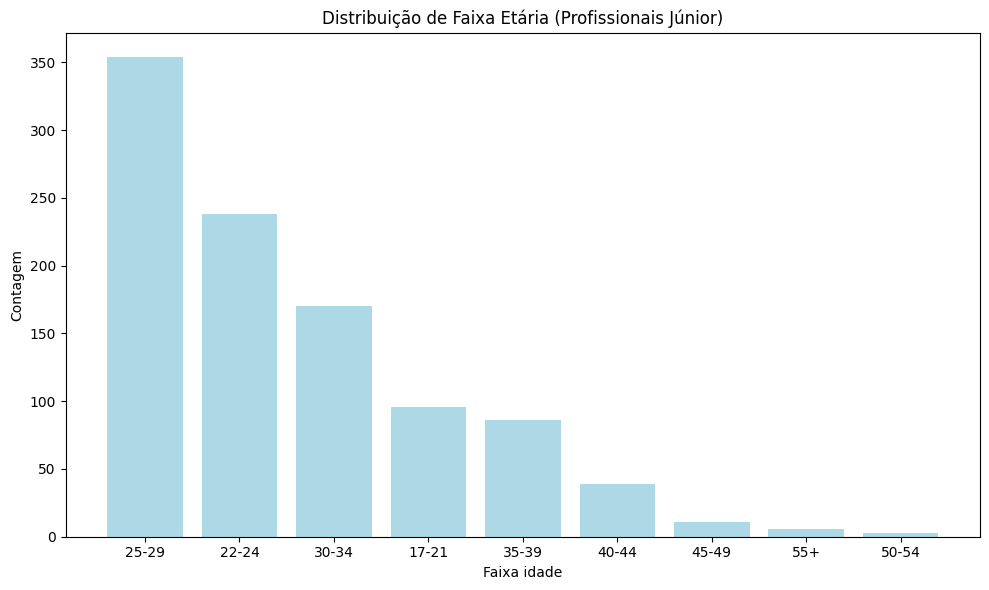

In [173]:
#Criando o gráfico
import matplotlib.pyplot as plt

juniors_por_idade = df_pergunta1['Faixa idade'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(juniors_por_idade.index, juniors_por_idade.values, color='lightblue')
plt.xlabel('Faixa idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Faixa Etária (Profissionais Júnior)')
plt.xticks
plt.tight_layout()
plt.show()

### **Pergunta 2**
### Qual a área de formação mais comum para profissionais em início de carreira?

In [176]:
#Filtrando o dataframe sobre Carreira
df_3_carreira['Nivel'].value_counts()
df_3_carreira_filtrado = df_3_carreira.loc[df['Nivel'] == 'Júnior']

In [177]:
#Juntando os 2 dataframes

#df_1_demograficos com df_3_carreira_filtrado
df_pergunta2 = pd.merge(df_1_demograficos, df_3_carreira_filtrado, on='Id', how='inner')

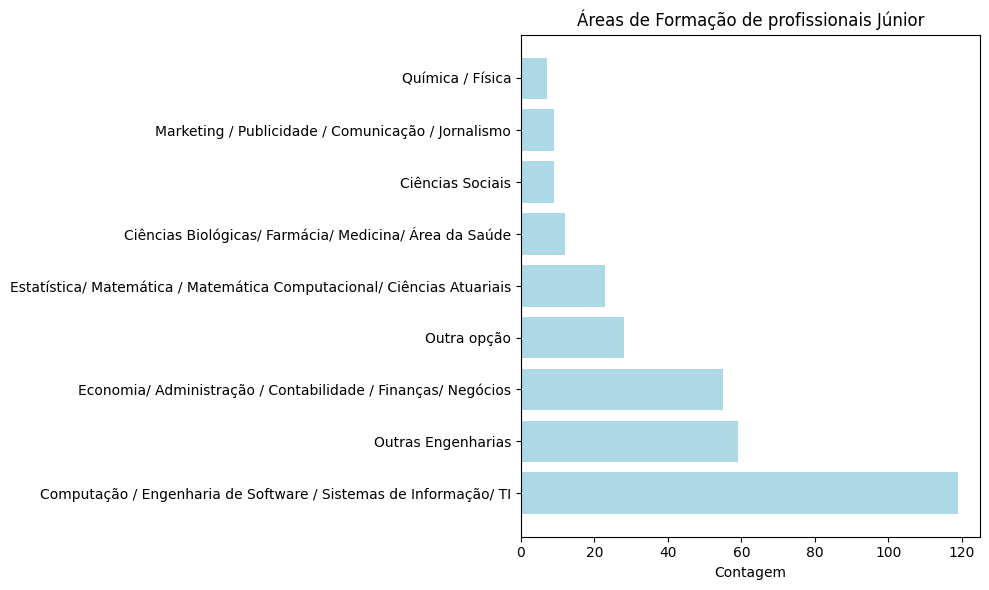

In [183]:
#Criando o gráfico

import matplotlib.pyplot as plt

juniors_por_formacao = df_pergunta2['Área de Formação'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(juniors_por_formacao.index, juniors_por_formacao.values, color='lightblue')
plt.xlabel('Contagem')
plt.title('Áreas de Formação de profissionais Júnior')
plt.xticks
plt.tight_layout()
plt.show()

### **Pergunta 3**
### Qual a média de tempo de busca de oportunidades para profissionais em migração de carreira?

In [192]:
#Filtrando o dataframe sobre Objetivos
df_pergunta3 = df_5_objetivos.loc[df_5_objetivos['Cluster'] == 2]
df_pergunta3

,Id,Objetivo na área de dados,Oportunidade buscada na área de dados,Tempo de busca de oportunidade na área de dados,Como tem sido a busca por um emprego na área de dados,Texto_Preprocessado,Cluster
3,00urm3jf2cek12w6ygue00urm3jzd17j,Migração de carreira: Trabalho em outra área e...,Analista de BI/BI Analyst,7 meses - 1 ano,"Já participei de 1 a 3 entrevistas, mas não fu...",migração carreira trabalho outra área busco re...,2
8,01n9nd73iv68k81iefenxv01n9nd7wjt,Migração de carreira: Trabalho em outra área e...,Analista de Dados/Data Analyst,0 - 6 meses,Ainda não me candidatei a nenhuma vaga na área,migração carreira trabalho outra área busco re...,2
93,0lw4azzxw5hfcsb86ack0lw4azz8myxk,Migração de carreira: Trabalho em outra área e...,Analista de Dados/Data Analyst,7 meses - 1 ano,"Já participei de 1 a 3 entrevistas, mas não fu...",migração carreira trabalho outra área busco re...,2
157,10cxvir35zl4k2ok310cxvrssym5ibl8,Migração de carreira: Trabalho em outra área e...,Cientista de Dados/Data Scientist,0 - 6 meses,"Já me candidatei, mas nunca fui chamado para e...",migração carreira trabalho outra área busco re...,2
216,1cvdowb6yipk7a1cvdojvmnkjlhtfebp,Migração de carreira: Trabalho em outra área e...,Engenheiro de Dados/Arquiteto de Dados/Data En...,1 ano - 2 anos,"Já participei de 1 a 3 entrevistas, mas não fu...",migração carreira trabalho outra área busco re...,2
...,...,...,...,...,...,...,...
5015,y33s1pp4rjd7czdy33sj8974fr1ogpd0,Migração de carreira: Trabalho em outra área e...,Cientista de Dados/Data Scientist,0 - 6 meses,Ainda não me candidatei a nenhuma vaga na área,migração carreira trabalho outra área busco re...,2
5044,ya5cq8fwqayyy5ya5cq827x7riyxr72k,Migração de carreira: Trabalho em outra área e...,Analista de Dados/Data Analyst,0 - 6 meses,"Já me candidatei, mas nunca fui chamado para e...",migração carreira trabalho outra área busco re...,2
5140,z0ihowfolvxf03z0iht2sullukwzrdr1,Migração de carreira: Trabalho em outra área e...,Cientista de Dados/Data Scientist,0 - 6 meses,"Já me candidatei, mas nunca fui chamado para e...",migração carreira trabalho outra área busco re...,2
5284,zxvqqx4k2pmcnx45vy4wzxvqdzq0exzh,Migração de carreira: Trabalho em outra área e...,Cientista de Dados/Data Scientist,7 meses - 1 ano,Ainda não me candidatei a nenhuma vaga na área,migração carreira trabalho outra área busco re...,2


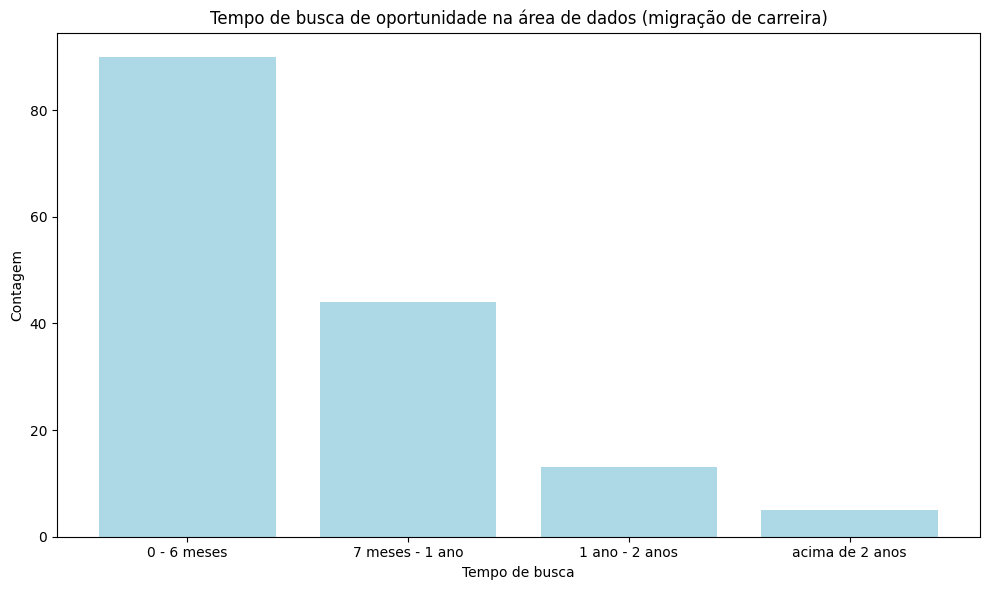

In [194]:
#Criando o gráfico
import matplotlib.pyplot as plt

tempo_de_migracao = df_pergunta3['Tempo de busca de oportunidade na área de dados'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(tempo_de_migracao.index, tempo_de_migracao.values, color='lightblue')
plt.xlabel('Tempo de busca')
plt.ylabel('Contagem')
plt.title('Tempo de busca de oportunidade na área de dados (migração de carreira)')
plt.xticks
plt.tight_layout()
plt.show()